In [ ]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms.csv to mushrooms (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('mushrooms.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
X = df.drop('class',axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    train_size=0.8,
    random_state=42,

)
class_probs = y_train.value_counts(normalize=True).to_dict()
class_probs

{'e': 0.5177719649176796, 'p': 0.48222803508232037}

In [ ]:
#Training phase in NB
# Calculate probabilities for each class separately
prob_map_edible = {}
prob_map_poisonous = {}

for column in X.columns:
    # Probabilities for edible mushrooms
    edible_data = X[y == 'e']
    prob_map_edible[column] = edible_data[column].value_counts(normalize=True).to_dict()

    # Probabilities for poisonous mushrooms
    poisonous_data = X[y == 'p']
    prob_map_poisonous[column] = poisonous_data[column].value_counts(normalize=True).to_dict()



In [ ]:
test_predictions = []

for idx, row in X_test.iterrows():
    # Calculate probability for edible class
    prob_edible = class_probs['e']
    for attr, value in row.items():
        prob_edible *= prob_map_edible.get(attr, {}).get(value, 1.0)

    # Calculate probability for poisonous class
    prob_poisonous = class_probs['p']
    for attr, value in row.items():
        prob_poisonous *= prob_map_poisonous.get(attr, {}).get(value, 1.0)

    # Predict the class with higher probability
    predicted_class = 'e' if prob_edible > prob_poisonous else 'p'
    test_predictions.append(predicted_class)
test_predictions

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9446


##Using Laplace or m-estimate


In [ ]:
#Training phase in NB
# Calculate probabilities for each class separately
prob_map_edible = {}
prob_map_poisonous = {}

for column in X.columns:
    # Probabilities for edible mushrooms
    edible_data = X[y == 'e']
    prob_map_edible[column] = edible_data[column].value_counts().to_dict()

    # Probabilities for poisonous mushrooms
    poisonous_data = X[y == 'p']
    prob_map_poisonous[column] = poisonous_data[column].value_counts().to_dict()
prob_map_edible

In [ ]:
def m_estimate(count, total,  k=2 ):
   return (count + 1) / (total + k)

test_predictions = []
class_counts = df['class'].value_counts().to_dict()
for idx, row in X_test.iterrows():
    # Calculate probability for edible class
    prob_edible = class_probs['e']
    for attr, value in row.items():
        prob_c = prob_map_edible.get(attr, {}).get(value, 1.0)
        prob_edible *= m_estimate(prob_c,class_counts['e'])

    # Calculate probability for poisonous class
    prob_poisonous = class_probs['p']
    for attr, value in row.items():
        prob_c = prob_map_poisonous.get(attr, {}).get(value, 1.0)
        prob_poisonous *= m_estimate(prob_c,class_counts['p'])

    # Predict the class with higher probability
    predicted_class = 'e' if prob_edible > prob_poisonous else 'p'
    test_predictions.append(predicted_class)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9446


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, pos_label='e')  # edible as positive
recall = recall_score(y_test, test_predictions, pos_label='e')
f1 = f1_score(y_test, test_predictions, pos_label='e')
print("Accuracy", accuracy, " Precision ", precision , " Recall ", recall, " F1 Score ", f1)

Accuracy 0.9446153846153846  Precision  0.9087947882736156  Recall  0.9928825622775801  F1 Score  0.9489795918367347


##Confusion matrix


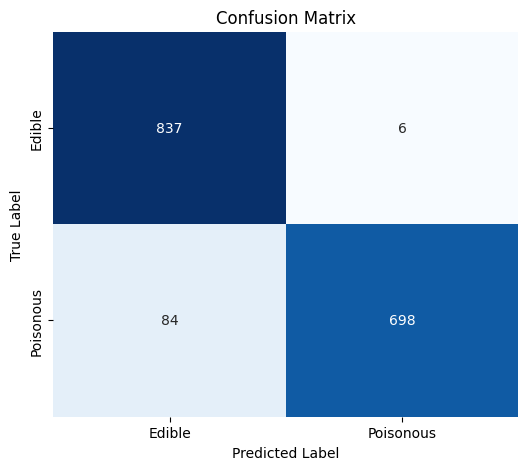

In [ ]:
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()